In [ ]:
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adagrad
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import hashlib
scaler = StandardScaler()

In [ ]:
train_df = pd.read_csv('train.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(42000, 785)

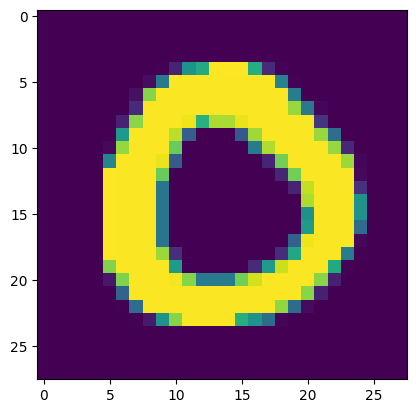

0

In [ ]:
def check_digit(idx,data=train_df,index=False):
  exp_col = 1
  if index:
    exp_col = 2
  plt.imshow(data.iloc[idx,exp_col:].values.reshape(28,28))
  plt.show()
check_digit(4)
train_df.iloc[4,0]

**This type of problems can be easily done by MLP or a simple DNN, let's try some of machine learning problems then we'll use ANN**

In [ ]:
def test_set_check(identifier,test_ratio,hash):
    """
    it's recommended to pass identifier from dataset which will not change or barely change you can gice index but if its not changing
    then it will be good to use hash of index either something like, 'longitude', 'latitude'... etc.
    """
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    """
    it'll return train_set, test_set sequentially.
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio=test_ratio,hash=hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [ ]:
train_df = train_df.reset_index()
train_df

,index,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,41995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,41996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,41997,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,41998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_set, test_set = split_train_test_by_id(train_df,0.2,'index')
for set in (train_set,test_set):
  set.drop('index',axis=1,inplace=True)

<ipython-input-9-60832a11fb0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set.drop('index',axis=1,inplace=True)
<ipython-input-9-60832a11fb0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set.drop('index',axis=1,inplace=True)


In [ ]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,y_train,X_test,y_test = train_set.drop('label',axis=1),train_set['label'],test_set.drop('label',axis=1),test_set['label']

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
test_df = scaler.fit_transform(test_df)

In [ ]:
svc = SVC(kernel='linear',C=0.8,random_state=42)
svc.fit(X_train,y_train)

SVC(C=0.8, kernel='linear', random_state=42)

In [ ]:
y_preds = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_preds)
print(f"accuracy of svm: {accuracy}")

accuracy of svm: 0.9211839814277423


In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       869
           1       0.95      0.98      0.97       954
           2       0.89      0.93      0.91       834
           3       0.88      0.88      0.88       900
           4       0.91      0.95      0.93       830
           5       0.89      0.87      0.88       800
           6       0.96      0.95      0.96       858
           7       0.94      0.93      0.94       899
           8       0.91      0.85      0.88       843
           9       0.92      0.88      0.90       828

    accuracy                           0.92      8615
   macro avg       0.92      0.92      0.92      8615
weighted avg       0.92      0.92      0.92      8615



In [ ]:
cm = confusion_matrix(y_test,y_preds)
cm

array([[847,   0,   1,   2,   1,   7,   6,   0,   4,   1],
       [  0, 937,   2,   1,   1,   1,   1,   1,   9,   1],
       [  7,  12, 775,  10,   8,   3,   6,   7,   5,   1],
       [  1,   4,  32, 791,   2,  32,   0,   5,  21,  12],
       [  2,   3,   4,   0, 789,   1,   7,   8,   2,  14],
       [ 12,   3,  10,  50,   4, 698,   7,   2,  11,   3],
       [  5,   0,  13,   0,   6,  14, 815,   0,   5,   0],
       [  1,   5,   9,   2,  12,   1,   1, 840,   2,  26],
       [  7,  17,  24,  29,   8,  26,   4,   4, 716,   8],
       [  3,   6,   5,  10,  40,   5,   0,  22,   9, 728]])

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test,y_preds)
print(f"accuracy of svm: {accuracy}")

accuracy of svm: 0.9211839814277423


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       869
           1       0.99      0.98      0.98       954
           2       0.95      0.95      0.95       834
           3       0.96      0.92      0.94       900
           4       0.95      0.96      0.96       830
           5       0.94      0.95      0.94       800
           6       0.97      0.98      0.98       858
           7       0.95      0.96      0.95       899
           8       0.93      0.95      0.94       843
           9       0.94      0.93      0.93       828

    accuracy                           0.96      8615
   macro avg       0.96      0.96      0.96      8615
weighted avg       0.96      0.96      0.96      8615



In [ ]:
cm2 = confusion_matrix(y_test,predictions)
cm2

array([[850,   0,   2,   2,   0,   4,   7,   1,   2,   1],
       [  0, 934,   3,   0,   1,   2,   1,   3,   9,   1],
       [  5,   2, 791,   4,   6,   1,   2,  12,   9,   2],
       [  1,   3,   9, 831,   1,  18,   2,   6,  18,  11],
       [  3,   1,   8,   0, 797,   1,   3,   2,   3,  12],
       [  9,   1,   4,  11,   2, 758,   5,   2,   5,   3],
       [  1,   1,   3,   1,   0,   6, 842,   0,   3,   1],
       [  3,   2,   8,   2,   5,   1,   0, 861,   3,  14],
       [  2,   1,   5,   7,   5,  11,   5,   3, 797,   7],
       [  4,   1,   1,   7,  18,   5,   0,  16,   4, 772]])

**NNs**

In [ ]:
m,n = X_train.shape
model = Sequential([
    Input(shape=(n,)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

optimizer1 = Adam(learning_rate=0.001)
optimizer2 = RMSprop(learning_rate=0.001)
optimizer3 = SGD(learning_rate=0.001)
optimizer4 = Adagrad(learning_rate=0.001)

model.compile(optimizer=optimizer1,loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

epochs=100
batch_size=32

model.summary()

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 576,810 (2.20 MB)

 Trainable params: 576,810 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8465 - loss: 0.4905 - val_accuracy: 0.9510 - val_loss: 0.1768
Epoch 2/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9568 - loss: 0.1463 - val_accuracy: 0.9555 - val_loss: 0.1492
Epoch 3/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9701 - loss: 0.0976 - val_accuracy: 0.9651 - val_loss: 0.1237
Epoch 4/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0710 - val_accuracy: 0.9629 - val_loss: 0.1429
Epoch 5/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0624 - val_accuracy: 0.9660 - val_loss: 0.1299
Epoch 6/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0537 - val_accuracy: 0.9630 - val_loss: 0.1585
Epoch 7/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9684 - val_loss: 0.1425
Epoch 8/100
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 

**Plotting history**

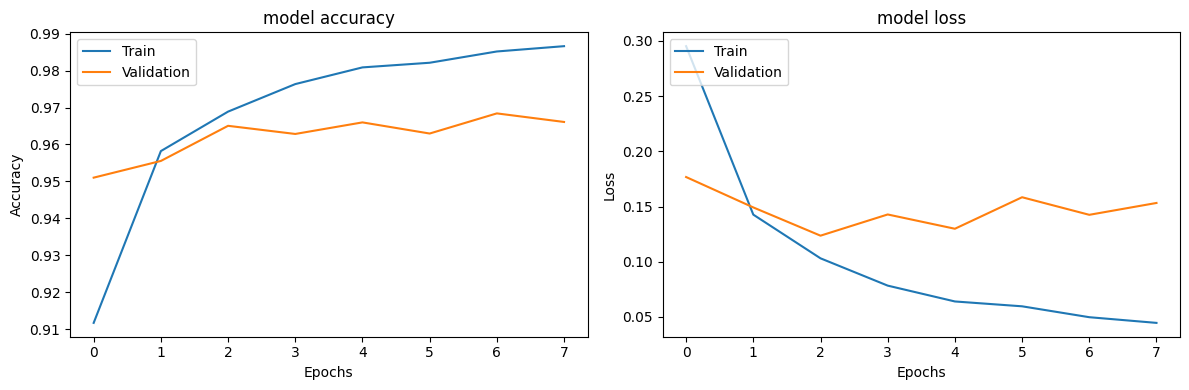

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
model.save('digit_recong.keras')

In [ ]:
sample_submission_df

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


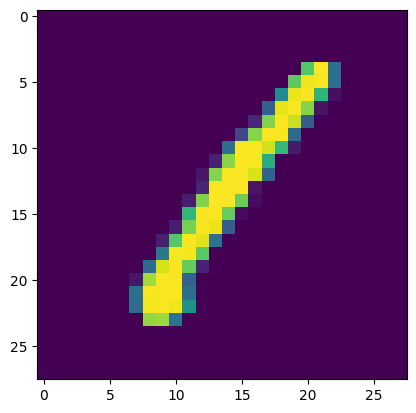

1

In [ ]:
check_digit(0,index=False)
np.argmax(y_train[0])

In [ ]:
test_df.shape, sample_submission_df.shape

((28000, 784), (28000, 2))

In [ ]:
y_preds_test = model.predict(test_df)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
y_preds_test.shape

(28000, 10)

In [ ]:
sample_submission_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
labels = [np.argmax(pred) for pred in y_preds_test]
labels[:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]

In [ ]:
len(labels)

28000

In [ ]:
sample_submission_df['Label'] = labels
sample_submission_df.to_csv('submission.csv', index=False)

In [ ]:
sample_submission_df['Label'].value_counts()

,count
Label,
1,3239
7,2859
2,2857
8,2832
0,2778
3,2759
9,2750
6,2729
4,2712
